In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import backend as K


Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [7]:
Input?

In [8]:
model = Sequential()
# model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 349s 6ms/step - loss: 0.2611 - acc: 0.9181 - val_loss: 0.0588 - val_acc: 0.9802
Epoch 2/12
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0872 - acc: 0.9740 - val_loss: 0.0434 - val_acc: 0.9860
Epoch 3/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0371 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 344s 6ms/step - loss: 0.0554 - acc: 0.9828 - val_loss: 0.0317 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0478 - acc: 0.9857 - val_loss: 0.0307 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0283 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 336s 6ms/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0274 - 

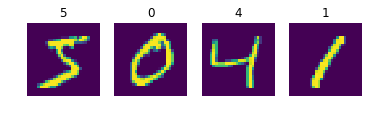

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=4) 
for i in range(4): 
    ax[i].imshow(x_train[i].reshape(28, 28), )
    ax[i].axis('off') 
    ax[i].set_title(str(np.argmax(y_train[i])))

In [29]:
np.argmax(y_train[i])

5